### Import Necessary Libraries



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


### Create Dataset

In [40]:

# create synthetic data

X,y_true = make_blobs(n_samples = 500 , centers = 4 , cluster_std = 0.60 , random_state = 0 )


# standardize features 
X = StandardScaler().fit_transform(X)


###  DBSCAN Clustering

In [41]:


# initialize dbscan

dbscan = DBSCAN(eps = 0.3 , min_samples = 5)

# fit the model

dbscan.fit(X)

labels = dbscan.labels_

In [42]:
print(labels) 

[ 0 -1  0  0  0  1  1  0  0  2  1  0  1  2  0  0  0  0  2  0  0  0  1  2
  0  2  0  1  2  1  1  1  0  1  1  0  2  0  2  0  2  0  0  0  1  0  0  0
  0  0  2  2  1  0  0  1  1  2  2  0  0  2  0  0  0  1  0  0  0  1  2  0
  2  0  2  0  1  1  0  0  2  0  2  0  0  1  2  2  0  2  2  2  0  2  0  0
  0  0  0  0  2  2  0  2  0  0  1  0  0  2  2  1  2  2  0  2  0  0  1  0
  0  2  0  0  2  0  0  0  0  2  0  2  1  2  2  2  0  0  0  1  0  0  0  0
  1  2  0  0  1  2  2  0  0  0  0  1  1  0  1  0  0  0  0  0  1  1  0  0
  2  1  0  2  0  1  0  2  0  2  2  2  0  0  0  0  1  2  1  0  1  2  0  1
  2  1  1  2  0  1  0  2  2  0  1  1  0  1  1  0  1  1  1  0  0  0  0  0
  1  2  2  2  0  0  1  2  1  0  2  0  2  1  1  1  1  1  0  0  0  1  2  0
  0  1  1  0  2  2  0  0  0  0  0  1  0  2  0  2  2  1  2  1  0  0  0  2
  0  0  0  0  2  0  0  2  0  1  0  2  1  1  0  0  0  0  0  1  0  1  1  0
  0  0  0  0  2  2  0  2  2  2  0  0  0  2  0  2  0  0  1  2  2  0  2  0
  0  0  2  1  2  1  1  0  0  0  1  1  2  0  0  1  2

### Analyze the Results

In [43]:

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_noise = list(labels).count(-1)


print(f'Estimated number of clusters : {n_clusters}')
print(f'Estimated number of noise points : {n_noise}')


Estimated number of clusters : 3
Estimated number of noise points : 5


### Evaluate Clustering Quality

In [44]:


if n_clusters > 1:
    score = silhouette_score(X, labels)
    print(f'Silhouette Score: {score:.2f}')
else:
    print("silhouette_score not defined for single cluster")


Silhouette Score: 0.55


### Visualize Clusters

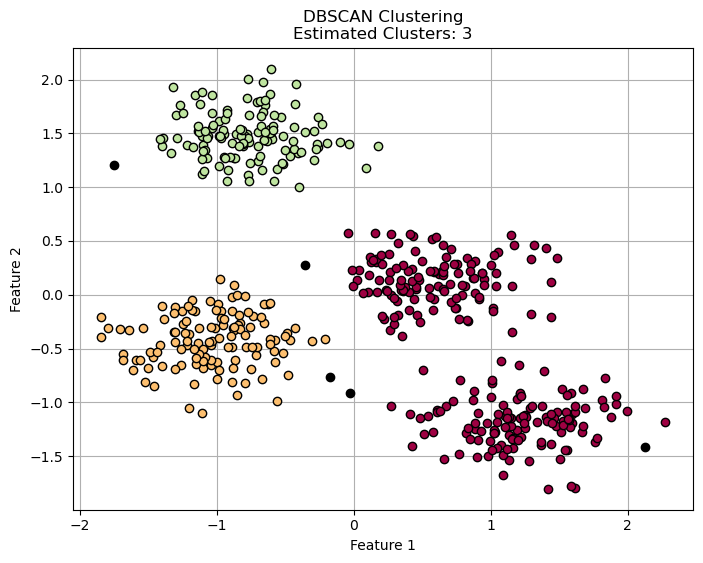

In [45]:
# Plot
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN Clustering\nEstimated Clusters: {n_clusters}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


### Parameter Tuning Tips

In [46]:

'''
Parameter Tuning Tips
eps (epsilon): Radius around a point to look for neighbors. Use k-distance plots to find elbow point.

min_samples: Minimum number of points required to form a dense region. Common default is 2 * n_features

'''



'\nParameter Tuning Tips\neps (epsilon): Radius around a point to look for neighbors. Use k-distance plots to find elbow point.\n\nmin_samples: Minimum number of points required to form a dense region. Common default is 2 * n_features\n\n'

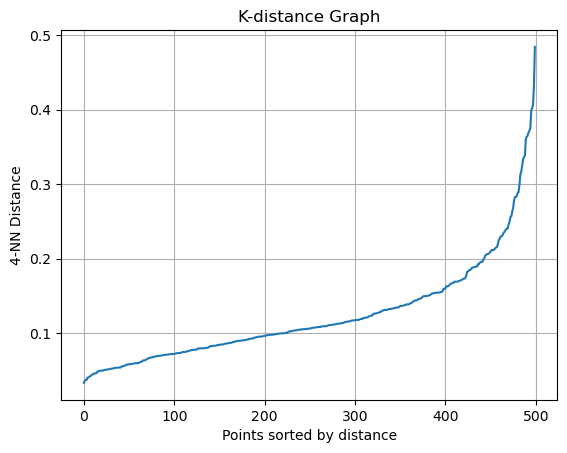

In [47]:


from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort and plot the k-distances
distances = np.sort(distances[:, 4], axis=0)  # 4th neighbor for min_samples=5
plt.plot(distances)
plt.title('K-distance Graph')
plt.ylabel('4-NN Distance')
plt.xlabel('Points sorted by distance')
plt.grid(True)
plt.show()
